In [1]:
###the problem graph

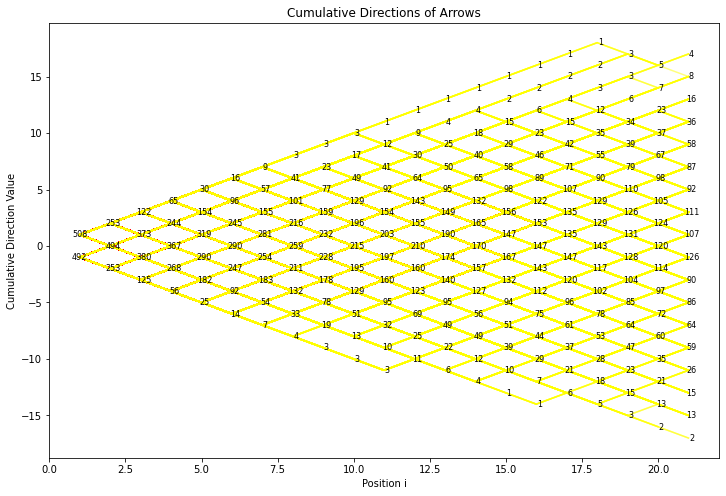

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulations and the value of n
num_simulations = 1000
n = 21

# Define the sum S of all numbers from 1 to n
S = sum(range(1, n+2))

# Initialize an array to store the sum of directions for each arrow position i for each simulation
sum_directions = np.zeros((num_simulations, n))

# Function to calculate the probability of a_i pointing right based on previous arrows
def prob_right(previous_arrows, S):
    return 0.5 + 0.5 * np.sum(previous_arrows * np.arange(1, len(previous_arrows)+1) / S)

# Run the simulations
for sim in range(num_simulations):
    arrows = np.zeros(n)  # Initialize an array to store the direction of each arrow
    for i in range(n):
        if i == 0:
            arrows[i] = 1 if np.random.rand() < 0.5 else -1
        else:
            p_right = prob_right(arrows[:i], S)
            arrows[i] = 1 if np.random.rand() < p_right else -1
        sum_directions[sim, i] = np.sum(arrows[:i+1])

# Calculate the frequency of ending points at each i
end_points = {}
for i in range(n):
    unique, counts = np.unique(sum_directions[:, i], return_counts=True)
    end_points[i] = dict(zip(unique, counts))

# Function to assign color based on frequency
def get_color(frequency, max_frequency):
    if frequency >= 0.6 * max_frequency:
        return 'red'  # More frequent
    elif frequency >= 0.3 * max_frequency:
        return 'orange'  # Less frequent
    else:
        return 'yellow'  # Rare

# Now we will plot the graph
plt.figure(figsize=(12, 8))

max_freq = max(max(counts.values()) for counts in end_points.values() if counts)

# Plot all simulations with a color based on their frequency
for i in range(1, n):
    for point, count in end_points[i].items():
        color = get_color(count, max_freq)
        for sim in range(num_simulations):
            if sum_directions[sim, i] == point:
                plt.plot(range(1, i+2), sum_directions[sim, :i+1], color=color, alpha=0.5)

# Calculate the total counts for the first arrow directions right and left
first_arrow_right_count = np.sum(sum_directions[:, 0] == 1)
first_arrow_left_count = np.sum(sum_directions[:, 0] == -1)

# Annotate the total counts for the first arrow directions at the start (i=0)
plt.text(1, 1, str(first_arrow_right_count), fontsize=8, ha='center', va='center', color='black')
plt.text(1, -1, str(first_arrow_left_count), fontsize=8, ha='center', va='center', color='black')

# Annotate the frequency of the lines at each point for i >= 2
for i in range(1, n):
    for point, count in end_points[i].items():
        plt.text(i + 1.1, point, str(count), fontsize=8, ha='center', va='center')

# Set the x and y axis labels
plt.xlabel('Position i')
plt.ylabel('Cumulative Direction Value')

# Set the title
plt.title('Cumulative Directions of Arrows')

# Show the plot
plt.show()


In [3]:
###50/50

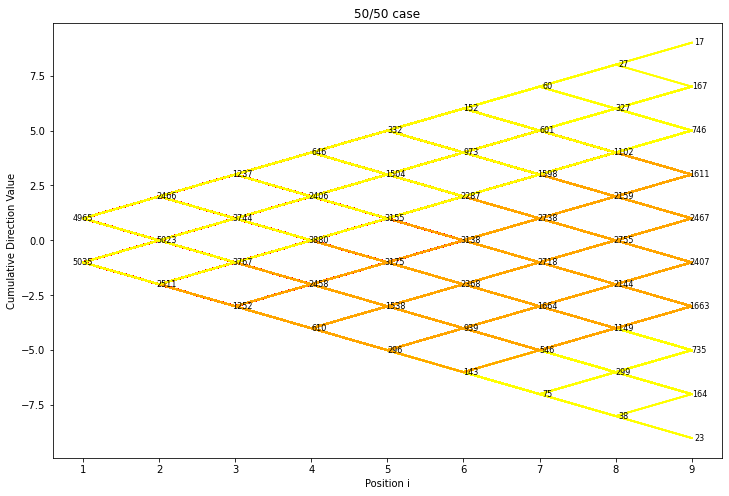

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulations and the value of n
num_simulations = 10000
n = 9

# Initialize an array to store the sum of directions for each arrow position i for each simulation
sum_directions = np.zeros((num_simulations, n))

# Run the simulations
for sim in range(num_simulations):
    arrows = np.zeros(n)  # Initialize an array to store the direction of each arrow
    for i in range(n):
        # Each arrow has a 50/50 chance to point right or left
        arrows[i] = 1 if np.random.rand() < 0.5 else -1
        sum_directions[sim, i] = np.sum(arrows[:i+1])

# Calculate the frequency of ending points at each i
end_points = {}
for i in range(n):
    unique, counts = np.unique(sum_directions[:, i], return_counts=True)
    end_points[i] = dict(zip(unique, counts))

# Function to assign color based on frequency
def get_color(frequency, max_frequency):
    if frequency >= 0.6 * max_frequency:
        return 'red'  # More frequent
    elif frequency >= 0.3 * max_frequency:
        return 'orange'  # Less frequent
    else:
        return 'yellow'  # Rare
    
# Now we will plot the graph
plt.figure(figsize=(12, 8))

max_freq = max(max(counts.values()) for counts in end_points.values() if counts)

# Plot all simulations with a color based on their frequency
for i in range(1, n):
    for point, count in end_points[i].items():
        color = get_color(count, max_freq)
        for sim in range(num_simulations):
            if sum_directions[sim, i] == point:
                plt.plot(range(1, i+2), sum_directions[sim, :i+1], color=color, alpha=0.5)

# Calculate the total counts for the first arrow directions right and left
first_arrow_right_count = np.sum(sum_directions[:, 0] == 1)
first_arrow_left_count = np.sum(sum_directions[:, 0] == -1)

# Annotate the total counts for the first arrow directions at the start (i=0)
plt.text(1, 1, str(first_arrow_right_count), fontsize=8, ha='center', va='center', color='black')
plt.text(1, -1, str(first_arrow_left_count), fontsize=8, ha='center', va='center', color='black')

# Annotate the frequency of the lines at each point for i >= 2
for i in range(1, n):
    for point, count in end_points[i].items():
        plt.text(i + 1.1, point, str(count), fontsize=8, ha='center', va='center')

# Set the x and y axis labels
plt.xlabel('Position i')
plt.ylabel('Cumulative Direction Value')

# Set the title
plt.title('50/50 case')

# Show the plot
plt.show()
